<a href="https://colab.research.google.com/github/molnaredom/melytanulas/blob/main/m%C3%A9lytanul%C3%A1s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.rész**# Adatok beolvasása


```
# Ez kódként van formázva
```




# Adatok beolvasása

In [2]:
import pandas as pd

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


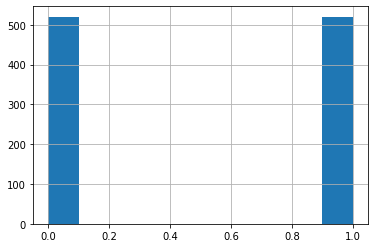

In [65]:


def set_df_disp(maxrow=False, max_col=False, maxwidth=False, maxcolwidth=False):
    """
    :param maxrow:
    :param max_col:
    :param maxwidth:
    :param maxcolwidth:
    :return:
    """
    if maxrow:
        pd.set_option('display.max_rows', None)
    if max_col:
        pd.set_option('display.max_columns', None)
    if maxwidth:
        pd.set_option('display.width', None)
    if maxcolwidth:
        pd.set_option('display.max_colwidth', -1)

set_df_disp(maxwidth= True, maxcolwidth=True)


data = pd.read_csv("https://raw.githubusercontent.com/molnaredom/melytanulas/main/train_data.csv",
                                      sep=',', error_bad_lines=False)
# shuffle train data
data_shuffled = data.sample(frac=1, random_state=1)
# separate train data
train = data_shuffled.iloc[:800,:]
validation = data_shuffled.iloc[800:,:]
train_label = train["class information"]
train_features = train.iloc[:,2:-2] # TODO szépen megcsinálni
validation_label = validation["class information"]
validation_features = validation.iloc[:,2:-2]

# label hist
data_shuffled["class information"].hist()

# TODO
# test_data = pd.read_csv("https://raw.githubusercontent.com/molnaredom/melytanulas/main/test_data.csv",
#                                       sep=',', error_bad_lines=False)
# print("test_data's shape:",test_data.shape)
# print(test_data.head())

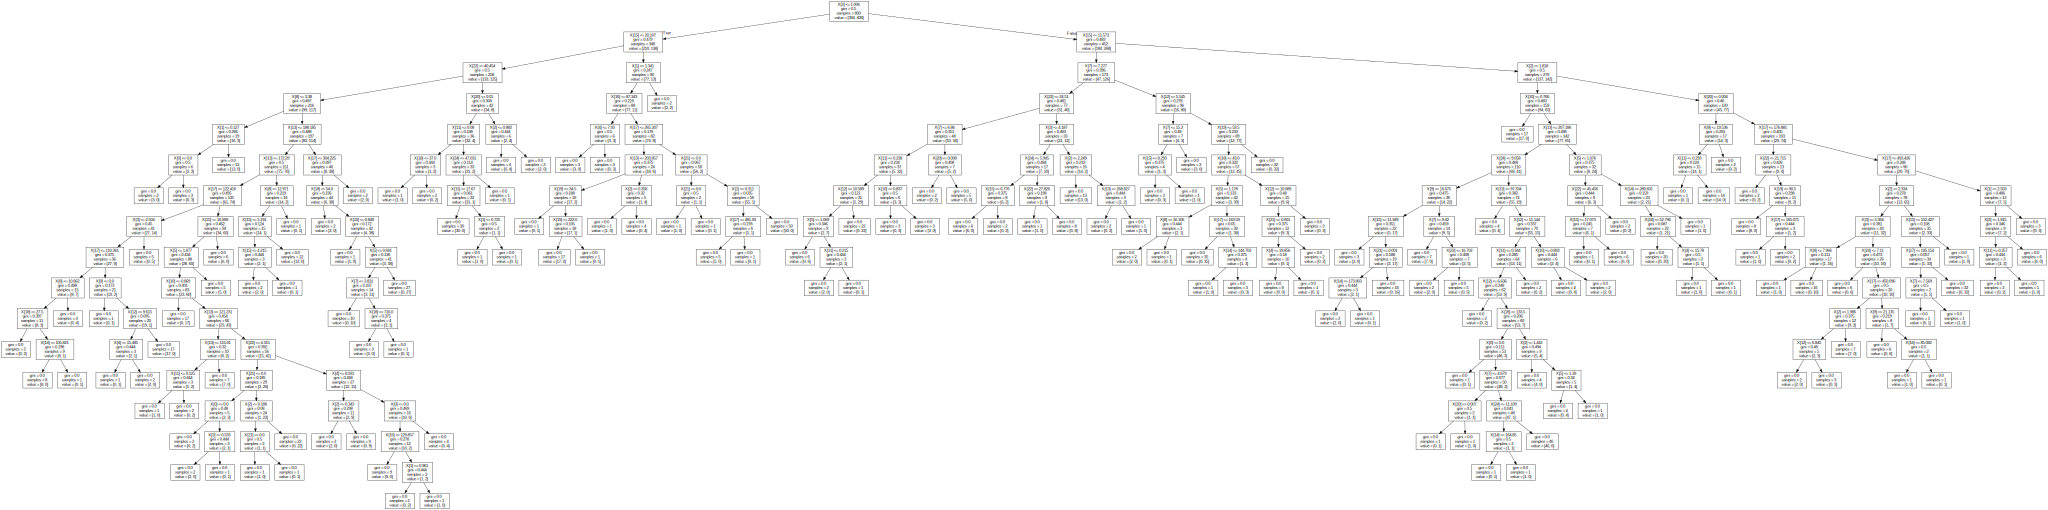

In [66]:
# decision tree
from sklearn import tree
import pydot
import graphviz
dt = tree.DecisionTreeClassifier()
dt.fit(train_features, train_label)


!apt-get -qq install -y graphviz && pip install -q pydot
!pip install graphviz
graphviz.Source(tree.export_graphviz(dt, out_file=None))

In [67]:
# prediction
from sklearn.metrics import classification_report
prediction = dt.predict(validation_features)
print(classification_report(validation_label, prediction))


              precision    recall  f1-score   support

           0       0.64      0.60      0.62       126
           1       0.59      0.63      0.61       114

    accuracy                           0.62       240
   macro avg       0.62      0.62      0.62       240
weighted avg       0.62      0.62      0.62       240

